<a href="https://colab.research.google.com/github/vncecruz/Emptech-2/blob/main/Cruz_Hands_on_Activity_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submission Details

Name: Vince Joseph B. Cruz<br>
Course and Section: CPE 019-CPE32S1 - Emerging Technologies 2 in CpE <br>
Date of Submission: July 8, 2024 <br>
Instructor: Engr. Roman Richard<br>

---

**Explain your datasets and the problem being addressed.**

This dataset is designed for developing machine learning models to predict anemia based on hemoglobin levels and color pixel distribution from images. It includes various features such as the percentage of red, green, and blue pixels, hemoglobin levels, and anemia status for each individual case.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install h5py

In [4]:
import numpy as np
import os
import pandas as pd
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Emptech/anaemia.csv')
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [8]:
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df['Anaemic'] = df['Anaemic'].astype('category')
df['Anaemic'] = df['Anaemic'].cat.codes
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,0,43.2555,30.8421,25.9025,6.3,1
1,2,1,45.6033,28.1900,26.2067,13.5,0
2,3,1,45.0107,28.9677,26.0215,11.7,0
3,4,1,44.5398,28.9899,26.4703,13.5,0
4,5,1,43.2870,30.6972,26.0158,12.4,0


**Save a model in HDF5 format**

**Save a model and load the model in a JSON format**

In [5]:
dataset = df.values
X = dataset[:,0:7]
Y = dataset[:,6]

# create model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 99.04%
Saved model to disk
Loaded model from disk
accuracy: 99.04%


In [6]:
#displaying the JSON file in JSON format
import json

# Specify the file path
file_path = '/content/model.json'

# Read the JSON file
with open(file_path) as json_file:
    data = json.load(json_file)

formatted_json = json.dumps(data, indent=4)
print(formatted_json)


{
    "class_name": "Sequential",
    "config": {
        "name": "sequential",
        "layers": [
            {
                "module": "keras.layers",
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        7
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "ragged": false,
                    "name": "dense_input"
                },
                "registered_name": null
            },
            {
                "module": "keras.layers",
                "class_name": "Dense",
                "config": {
                    "name": "dense",
                    "trainable": true,
                    "dtype": "float32",
                    "batch_input_shape": [
                        null,
                        7
                    ],
                    "units": 12,
                    "activ

**Save a model and load the model in a YAML format**

In [7]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Colab Notebooks/model_yaml.h5")
print("Saved model to disk")

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Colab Notebooks/model_yaml.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 99.04%
Saved model to disk
Loaded model from disk
accuracy: 99.04%


In [8]:
import yaml

# Specify the file path
file_path = '/content/model.yaml'

# Read the YAML file
with open(file_path, 'r') as yaml_file:
    data = yaml.safe_load(yaml_file)

# Convert the dictionary to YAML-like format
output = yaml.dump(data)

# Print the formatted output
print(output)

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: InputLayer
    config:
      batch_input_shape:
      - null
      - 7
      dtype: float32
      name: dense_3_input
      ragged: false
      sparse: false
    module: keras.layers
    registered_name: null
  - build_config:
      input_shape:
      - null
      - 7
    class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      batch_input_shape:
      - null
      - 7
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
        module: keras.initializers
        registered_name: null
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config:
          seed: null
        module: keras.initializers
        registered_name: null
      kernel_regularizer: null
      name: dense_3
      trainable: true
      units: 12
      use_bias: true
  

In [9]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

accuracy: 99.04%
Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Checkpoint Neural Network Model Improvements**

In [10]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.97143, saving model to weights-improvement-01-0.97.hdf5

Epoch 2: val_accuracy did not improve from 0.97143

Epoch 3: val_accuracy did not improve from 0.97143

Epoch 4: val_accuracy did not improve from 0.97143

Epoch 5: val_accuracy did not improve from 0.97143

Epoch 6: val_accuracy did not improve from 0.97143

Epoch 7: val_accuracy did not improve from 0.97143

Epoch 8: val_accuracy did not improve from 0.97143

Epoch 9: val_accuracy did not improve from 0.97143

Epoch 10: val_accuracy did not improve from 0.97143

Epoch 11: val_accuracy did not improve from 0.97143

Epoch 12: val_accuracy did not improve from 0.97143

Epoch 13: val_accuracy did not improve from 0.97143

Epoch 14: val_accuracy did not improve from 0.97143

Epoch 15: val_accuracy did not improve from 0.97143

Epoch 16: val_accuracy did not improve from 0.97143

Epoch 17: val_accuracy did not improve from 0.97143

Epoch 18: val_accuracy did not improve from 0.97143

Epo

**Checkpoint Best Neural Network Model only**

In [11]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.97143, saving model to weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.97143

Epoch 3: val_accuracy did not improve from 0.97143

Epoch 4: val_accuracy did not improve from 0.97143

Epoch 5: val_accuracy did not improve from 0.97143

Epoch 6: val_accuracy did not improve from 0.97143

Epoch 7: val_accuracy did not improve from 0.97143

Epoch 8: val_accuracy did not improve from 0.97143

Epoch 9: val_accuracy did not improve from 0.97143

Epoch 10: val_accuracy did not improve from 0.97143

Epoch 11: val_accuracy did not improve from 0.97143

Epoch 12: val_accuracy did not improve from 0.97143

Epoch 13: val_accuracy did not improve from 0.97143

Epoch 14: val_accuracy did not improve from 0.97143

Epoch 15: val_accuracy did not improve from 0.97143

Epoch 16: val_accuracy did not improve from 0.97143

Epoch 17: val_accuracy did not improve from 0.97143

Epoch 18: val_accuracy did not improve from 0.97143

Epoch 19: val_accu

**Load a saved Neural Network model**

In [12]:
# load weights
model.load_weights("weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
accuracy: 99.04%


**Visualize Model Training History in Keras**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


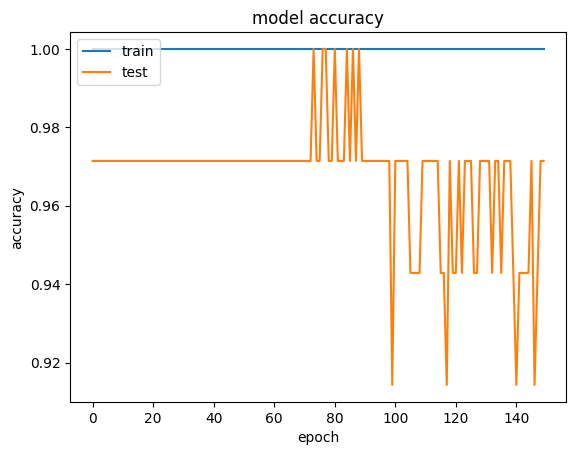

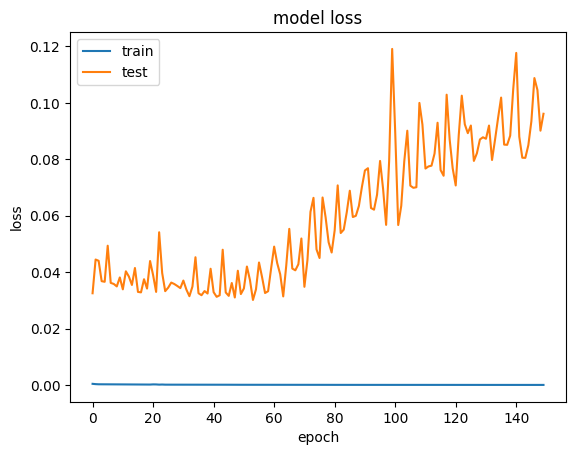

In [13]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Show the application of Dropout Regularization**

In [15]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 25.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [10]:
# Baseline Model on the Sonar Dataset
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv('/content/drive/MyDrive/Emptech/anaemia.csv')
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df['Anaemic'] = df['Anaemic'].astype('category')
df['Anaemic'] = df['Anaemic'].cat.codes
dataset = df.values
X = dataset[:,0:7]
Y = dataset[:,6]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Baseline model
def create_baseline():
    # Create model
    model = Sequential()
    model.add(Dense(12, input_shape=(7,), activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Baseline: 100.00% (0.00%)


**Show the application of Dropout on the visible layer**

In [12]:
# dropout in the input layer with weight constraint
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(7,)))
	model.add(Dense(12, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(6, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: 

Visible: 98.00% (4.00%)


**Show the application of Dropout on the hidden layer**

In [14]:
# Example of Dropout on the Sonar Dataset: Hidden Layer
# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(7,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(6, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Hidden: 100.00% (0.00%)


**Show the application of a time-based learning rate schedule**

In [16]:
# Time Based Learning Rate Decay

# split into input (X) and output (Y) variables
X = dataset[:,0:7].astype(float)
Y = dataset[:,6]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# create model
model = Sequential()
model.add(Dense(7, input_shape=(7,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
3/3 - 1s - 442ms/step - accuracy: 0.3913 - loss: 251.5952 - val_accuracy: 0.6857 - val_loss: 0.6563
Epoch 2/50
3/3 - 0s - 20ms/step - accuracy: 0.7826 - loss: 0.6175 - val_accuracy: 0.6857 - val_loss: 0.6290
Epoch 3/50
3/3 - 0s - 23ms/step - accuracy: 0.7826 - loss: 0.5651 - val_accuracy: 0.6857 - val_loss: 0.6225
Epoch 4/50
3/3 - 0s - 40ms/step - accuracy: 0.7826 - loss: 0.5414 - val_accuracy: 0.6857 - val_loss: 0.6280
Epoch 5/50
3/3 - 0s - 20ms/step - accuracy: 0.7826 - loss: 0.5274 - val_accuracy: 0.6857 - val_loss: 0.6362
Epoch 6/50
3/3 - 0s - 24ms/step - accuracy: 0.7826 - loss: 0.5238 - val_accuracy: 0.6857 - val_loss: 0.6441
Epoch 7/50
3/3 - 0s - 41ms/step - accuracy: 0.7826 - loss: 0.5232 - val_accuracy: 0.6857 - val_loss: 0.6505
Epoch 8/50
3/3 - 0s - 25ms/step - accuracy: 0.7826 - loss: 0.5251 - val_accuracy: 0.6857 - val_loss: 0.6563
Epoch 9/50
3/3 - 0s - 19ms/step - accuracy: 0.7826 - loss: 0.5242 - val_accuracy: 0.6857 - val_loss: 0.6561
Epoch 10/50
3/3 - 0s - 21

**Show the application of a drop-based learning rate schedule**

In [18]:
# Drop-Based Learning Rate Decay
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate
# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

Epoch 1/50
3/3 - 1s - 399ms/step - accuracy: 0.7826 - loss: 0.5249 - val_accuracy: 0.6857 - val_loss: 0.6553 - learning_rate: 0.1000
Epoch 2/50
3/3 - 0s - 101ms/step - accuracy: 0.7826 - loss: 0.5240 - val_accuracy: 0.6857 - val_loss: 0.6516 - learning_rate: 0.1000
Epoch 3/50
3/3 - 1s - 220ms/step - accuracy: 0.7826 - loss: 0.5252 - val_accuracy: 0.6857 - val_loss: 0.6474 - learning_rate: 0.1000
Epoch 4/50
3/3 - 0s - 100ms/step - accuracy: 0.7826 - loss: 0.5236 - val_accuracy: 0.6857 - val_loss: 0.6476 - learning_rate: 0.1000
Epoch 5/50
3/3 - 0s - 90ms/step - accuracy: 0.7826 - loss: 0.5236 - val_accuracy: 0.6857 - val_loss: 0.6489 - learning_rate: 0.1000
Epoch 6/50
3/3 - 0s - 44ms/step - accuracy: 0.7826 - loss: 0.5242 - val_accuracy: 0.6857 - val_loss: 0.6498 - learning_rate: 0.1000
Epoch 7/50
3/3 - 0s - 119ms/step - accuracy: 0.7826 - loss: 0.5240 - val_accuracy: 0.6857 - val_loss: 0.6476 - learning_rate: 0.1000
Epoch 8/50
3/3 - 0s - 86ms/step - accuracy: 0.7826 - loss: 0.5240 - val

# Conclusion

In this activity I learned how to use save and load neural network models in different formats such as HDF5, JSON, and YAML, which makes the model portability and flexibility. The use of checkpoints for saving model improvements and the best model state allows for efficient training management and recovery. Visualizing model training history in Keras helps track performance and see the issues. Using dropout regularization on visible and hidden layers and applying a time-based learning rate schedule improves generalization and optimizes training.